# Assignment 6: Testing Covid Hypothesis

# Task 1

In [1]:
# import pandas for structuring the data
import pandas as pd

In [84]:
df = pd.read_csv('../data/Municipality_cases_time_series.csv', index_col=None, na_values=['NA'], sep=';')


In [16]:
df.shape

(368, 100)

In [17]:
df.head()

,SampleDate,Roskilde,Copenhagen,Aarhus,Frederiksberg,Kalundborg,Middelfart,Gentofte,Solrød,Allerød,...,Ringsted,Struer,Brønderslev,Hedensted,Varde,Læsø,Ærø,Fanø,Samsø,NA
0,2020-02-26,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-27,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-02-28,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-01,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-02,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Task 2

In [47]:
selected_columns = df[["Copenhagen","Aarhus"]]
small_df = selected_columns.copy()
small_df.head()


,Copenhagen,Aarhus
0,0,0
1,1,0
2,0,1
3,1,0
4,1,0


# Task 3

<AxesSubplot:ylabel='Density'>

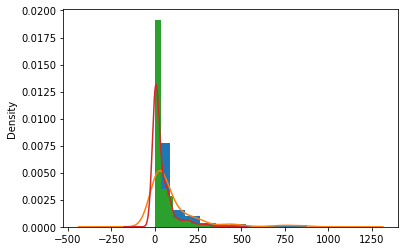

In [57]:

small_df.Copenhagen.plot.hist(density=True)
small_df.Copenhagen.plot.density()
small_df.Aarhus.plot.hist(density=True)
small_df.Aarhus.plot.density()

In [58]:
#sampleDate = small_df.groupby(['SampleDate']).mean()
#sampleDate['Copenhagen'].plot.bar()

In [56]:
small_df.sum()

Copenhagen    38304
Aarhus        14728
dtype: int64

<AxesSubplot:>

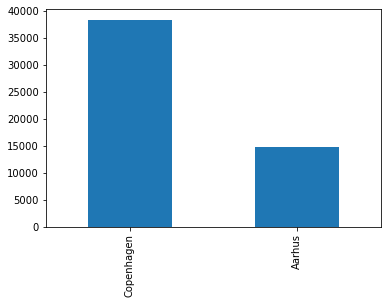

In [59]:
small_df.sum(axis=0)
small_df.sum(axis=0).plot.bar()

Der bor omkring 300k i Århus kommune, og 600k mennesker i Københavns kommune. Derfor giver det god mening at der er dobbelt så mange cases i Københavns kommune. 

Det kunne også være relevant at se hvor mange cases der er på måned, så vi laver en ny kolonne med måneder ud fra sampleDate

# Task 4

In [67]:
from scipy.stats import ttest_ind

In [71]:
ttest_ind(small_df['Aarhus'],small_df['Copenhagen'])

Ttest_indResult(statistic=-7.230236015186165, pvalue=1.2134273586737387e-12)

Tvalue = -7.230236015186165, pvalue = 1.2134273586737387e-12

In [75]:
small_df['Aarhus'].mean()

40.02173913043478

In [74]:
small_df['Copenhagen'].mean()

104.08695652173913

In [76]:
small_df.std(axis = 0, skipna = True)

Copenhagen    158.800847
Aarhus         60.621347
dtype: float64

In [77]:
small_df.var()

Copenhagen    25217.709039
Aarhus         3674.947755
dtype: float64

Man burde justure mean til at reflektere at københavns befolkingsstal er ca. dobbelt så stor i forhold til Aarhus.